In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams["figure.figsize"] = (100,15)
plt.rcParams.update({'font.size': 28})
plot_colors = ['red','green','blue']        # SFC, grow, metis respectively

In [264]:
input_file_name = '2023-11-11___00-53-31'
df = pd.read_json(input_file_name+'.json')
# df = pd.read_csv('partition_results.csv')  
partition_count = df['np'][0]
df_length = len(df.index)
print(df.loc[17]['mesh_file'])

/home/budvin/research/Partitioning/Meshes/10k_tet/225965_sf_hexa.mesh_4114_14115.obj.mesh


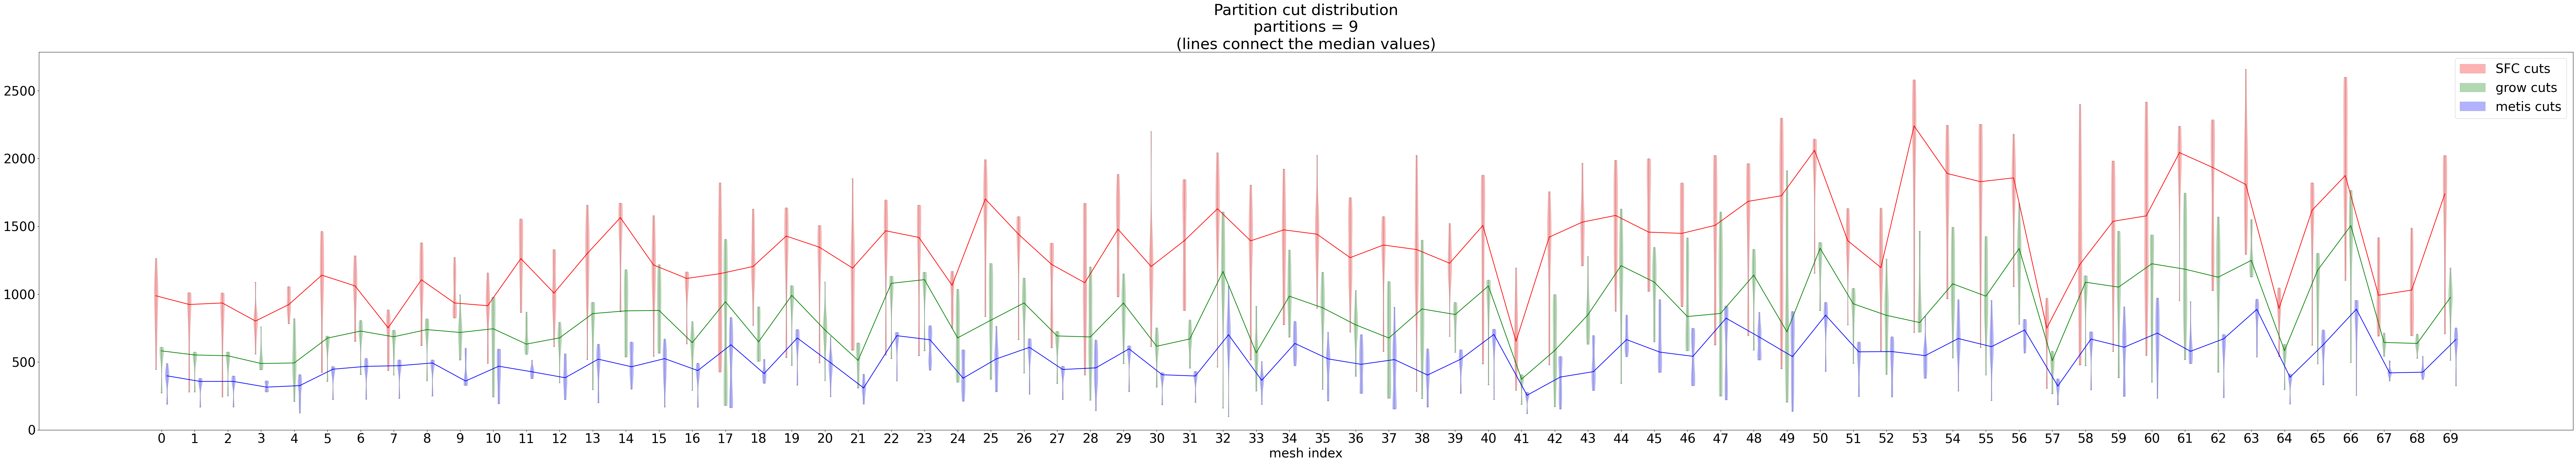

In [265]:
fig0, ax0 = plt.subplots()
plt_triplets = [None for _ in range(df_length)]
for plt_i in range(df_length):
  plt_triplets[plt_i] = ax0.violinplot([df.loc[plt_i]['SFC_partitions_cuts'],df.loc[plt_i]['grow_partitions_cuts'],df.loc[plt_i]['metis_partitions_cuts']], positions=[6*plt_i,6*plt_i+1,6*plt_i+2], showmedians=True, widths=0.7, points=100, showextrema=True, bw_method=0.5)


ax0.plot([6*i for i in range(df_length)],[np.median(df.loc[i]['SFC_partitions_cuts']) for i in range(df_length)],color=plot_colors[0])
ax0.plot([6*i+1 for i in range(df_length)],[np.median(df.loc[i]['grow_partitions_cuts']) for i in range(df_length)],color=plot_colors[1])
ax0.plot([6*i+2 for i in range(df_length)],[np.median(df.loc[i]['metis_partitions_cuts']) for i in range(df_length)],color=plot_colors[2])



for plt_triplet in plt_triplets:

  for i in range(3):
     plt_triplet['bodies'][i].set_facecolor(plot_colors[i])
     plt_triplet['bodies'][i].set_edgecolor('black')
     plt_triplet['bodies'][i].set_linewidth(0.3)

  for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
      vp = plt_triplet[partname]
      vp.set_edgecolor("black")
      vp.set_linewidth(0.3)


  # plot_pair['bodies'][1].set_edgecolor('red')
ax0.legend([plt_triplets[0]["bodies"][0], plt_triplets[0]["bodies"][1],plt_triplets[0]["bodies"][2]], ['SFC cuts', 'grow cuts', 'metis cuts'],bbox_to_anchor=(1.0, 1.0))

ax0.set_xticks([(6*i + 6*i+2)/2 for i in range(df_length)])

# ax0.set_xticklabels(['Data 1-2', 'Data 3-4'])
ax0.set_xticklabels([str(i) for i in range(df_length)])
ax0.set_ylim(bottom=0)
ax0.set_title(f'Partition cut distribution\npartitions = {partition_count}\n(lines connect the median values)')
ax0.set_xlabel('mesh index')
plt.show()
fig0.savefig(input_file_name+'partition-cuts.svg', format='svg', dpi=1200)

Text(0.5, 0, 'mesh index')

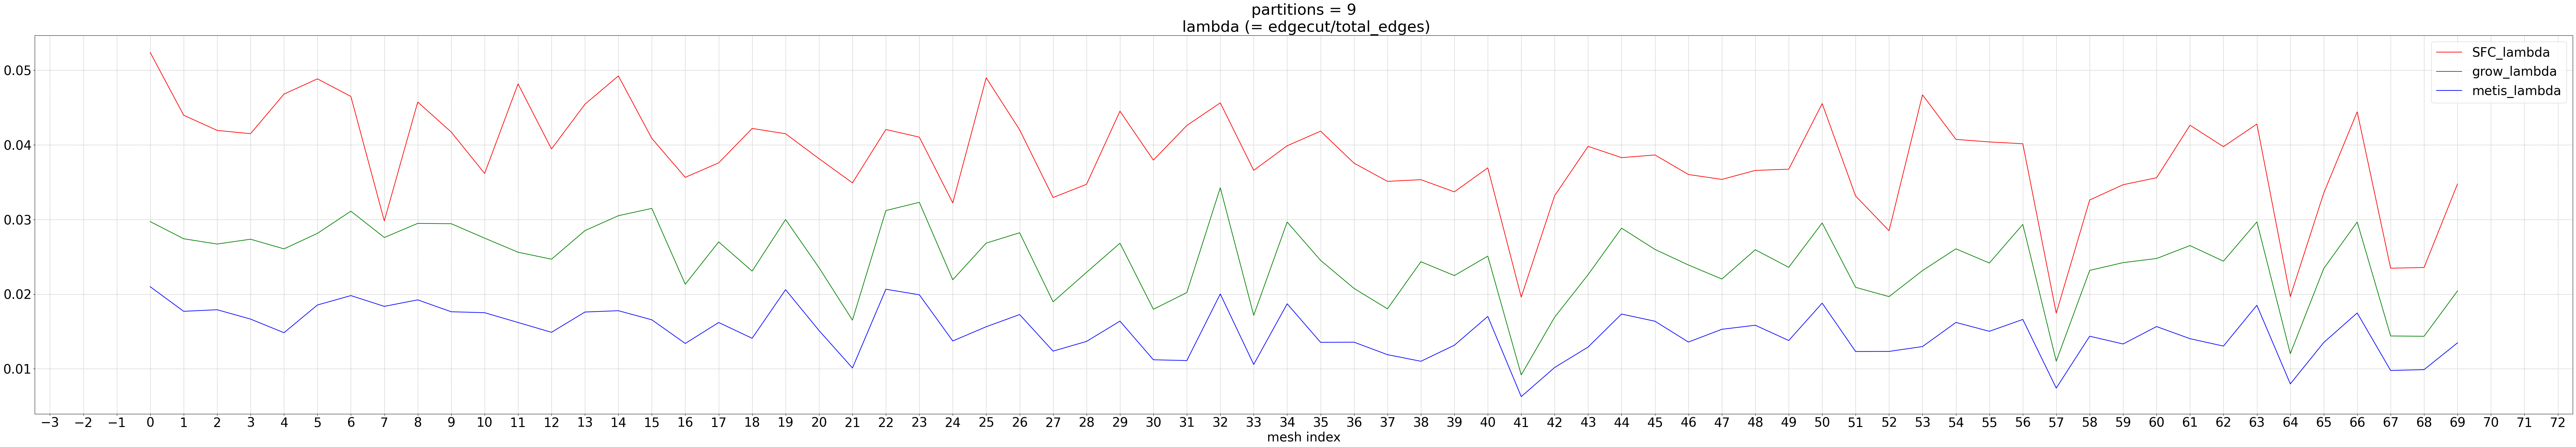

In [266]:

ax1 = df.plot.line(y = ['SFC_lambda','grow_lambda','metis_lambda'], rot=0,color=plot_colors)
ax1.set_title(f"partitions = {partition_count}\n lambda (= edgecut/total_edges)")
ax1.legend(bbox_to_anchor=(1.0, 1.0))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.grid(which='major', axis='both', linestyle='--')
ax1.set_xlabel('mesh index')



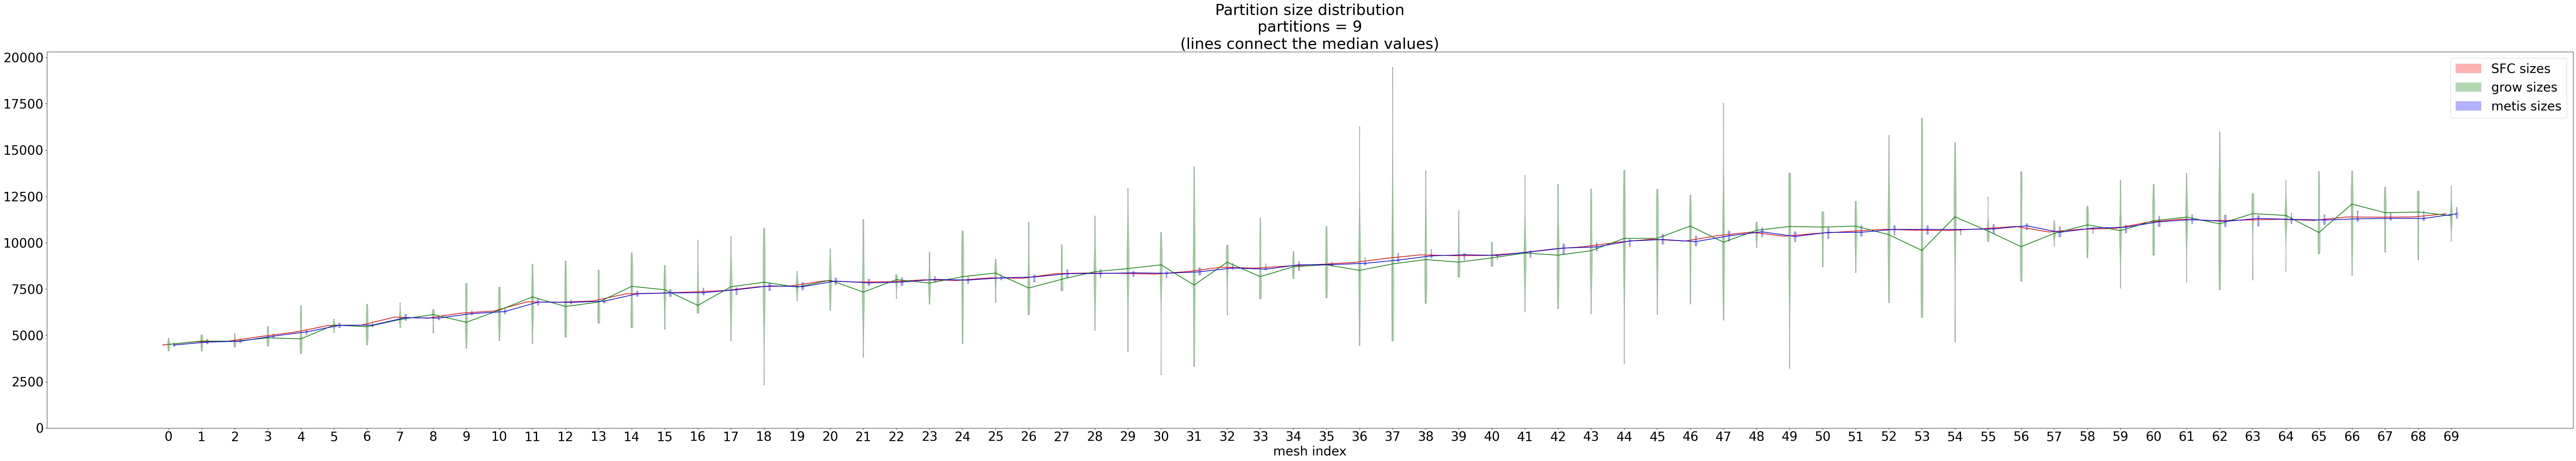

In [267]:
fig11, ax11 = plt.subplots()
plt_triplets = [None for _ in range(df_length)]
for plt_i in range(df_length):
  plt_triplets[plt_i] = ax11.violinplot([df.loc[plt_i]['SFC_partition_sizes'],df.loc[plt_i]['grow_partition_sizes'],df.loc[plt_i]['metis_partition_sizes']], positions=[6*plt_i,6*plt_i+1,6*plt_i+2], showmedians=True, widths=0.5, points=100, showextrema=True, bw_method=0.5)


ax11.plot([6*i for i in range(df_length)],[np.median(df.loc[i]['SFC_partition_sizes']) for i in range(df_length)],color=plot_colors[0])
ax11.plot([6*i+1 for i in range(df_length)],[np.median(df.loc[i]['grow_partition_sizes']) for i in range(df_length)],color=plot_colors[1])
ax11.plot([6*i+2 for i in range(df_length)],[np.median(df.loc[i]['metis_partition_sizes']) for i in range(df_length)],color=plot_colors[2])



for plt_triplet in plt_triplets:

  for i in range(3):
     plt_triplet['bodies'][i].set_facecolor(plot_colors[i])
     plt_triplet['bodies'][i].set_edgecolor('black')
     plt_triplet['bodies'][i].set_linewidth(0.3)

  for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians'):
      vp = plt_triplet[partname]
      vp.set_edgecolor("black")
      vp.set_linewidth(0.3)


  # plot_pair['bodies'][1].set_edgecolor('red')
ax11.legend([plt_triplets[0]["bodies"][0], plt_triplets[0]["bodies"][1],plt_triplets[0]["bodies"][2]], ['SFC sizes', 'grow sizes', 'metis sizes'],bbox_to_anchor=(1.0, 1.0))

ax11.set_xticks([(6*i + 6*i+2)/2 for i in range(df_length)])

# ax11.set_xticklabels(['Data 1-2', 'Data 3-4'])
ax11.set_xticklabels([str(i) for i in range(df_length)])
ax11.set_ylim(bottom=0)

ax11.set_title(f'Partition size distribution\npartitions = {partition_count}\n(lines connect the median values)')
ax11.set_xlabel('mesh index')
plt.show()
fig11.savefig(input_file_name+'partition-sizes.svg', format='svg', dpi=1200)

Text(0.5, 0, 'mesh index')

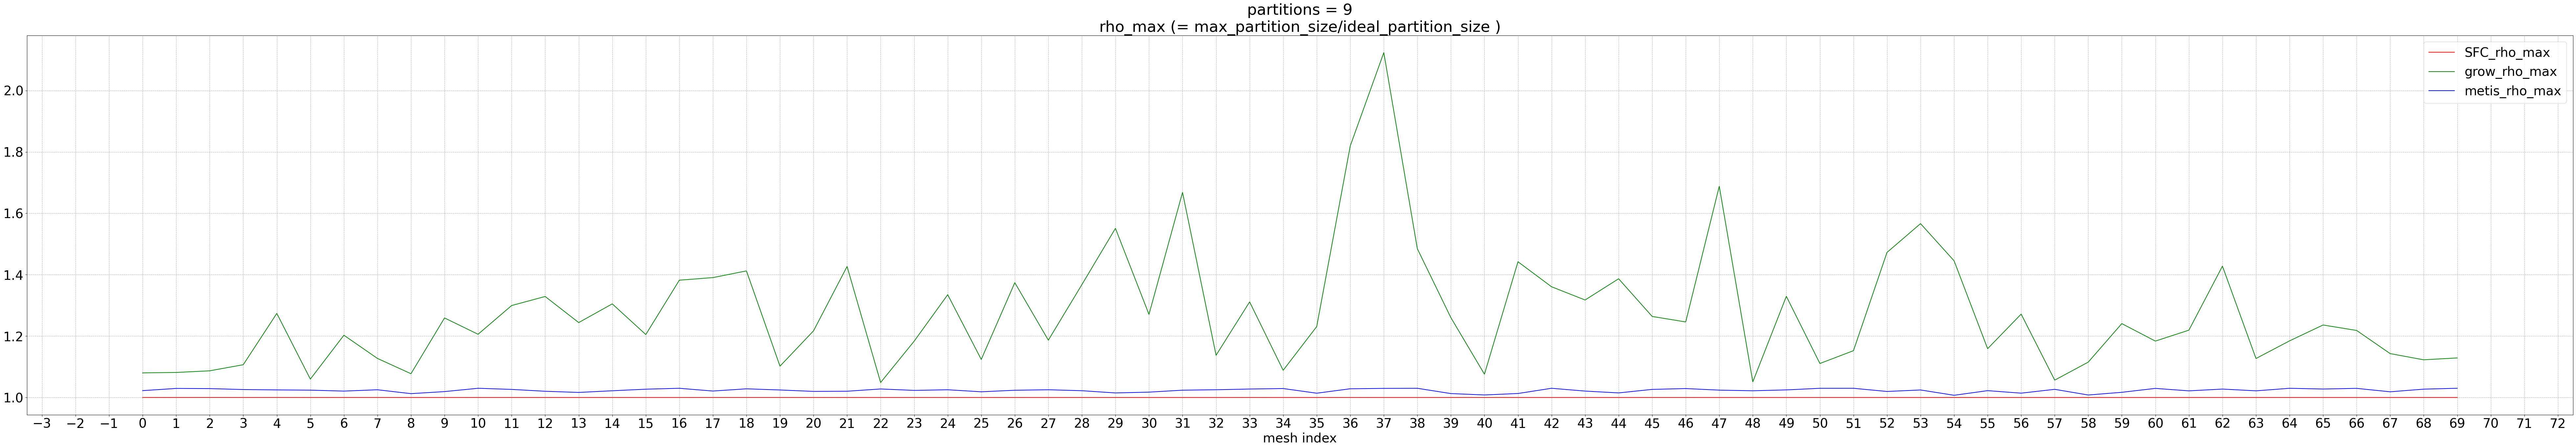

In [268]:
ax2 = df.plot.line(y = ['SFC_rho_max','grow_rho_max','metis_rho_max',], rot=0,color=plot_colors)
ax2.set_title(f"partitions = {partition_count}\nrho_max (= max_partition_size/ideal_partition_size )")
ax2.legend(bbox_to_anchor=(1.0, 1.0))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.grid(which='major', axis='both', linestyle='--')
ax2.set_xlabel('mesh index')


Text(0.5, 0, 'mesh index')

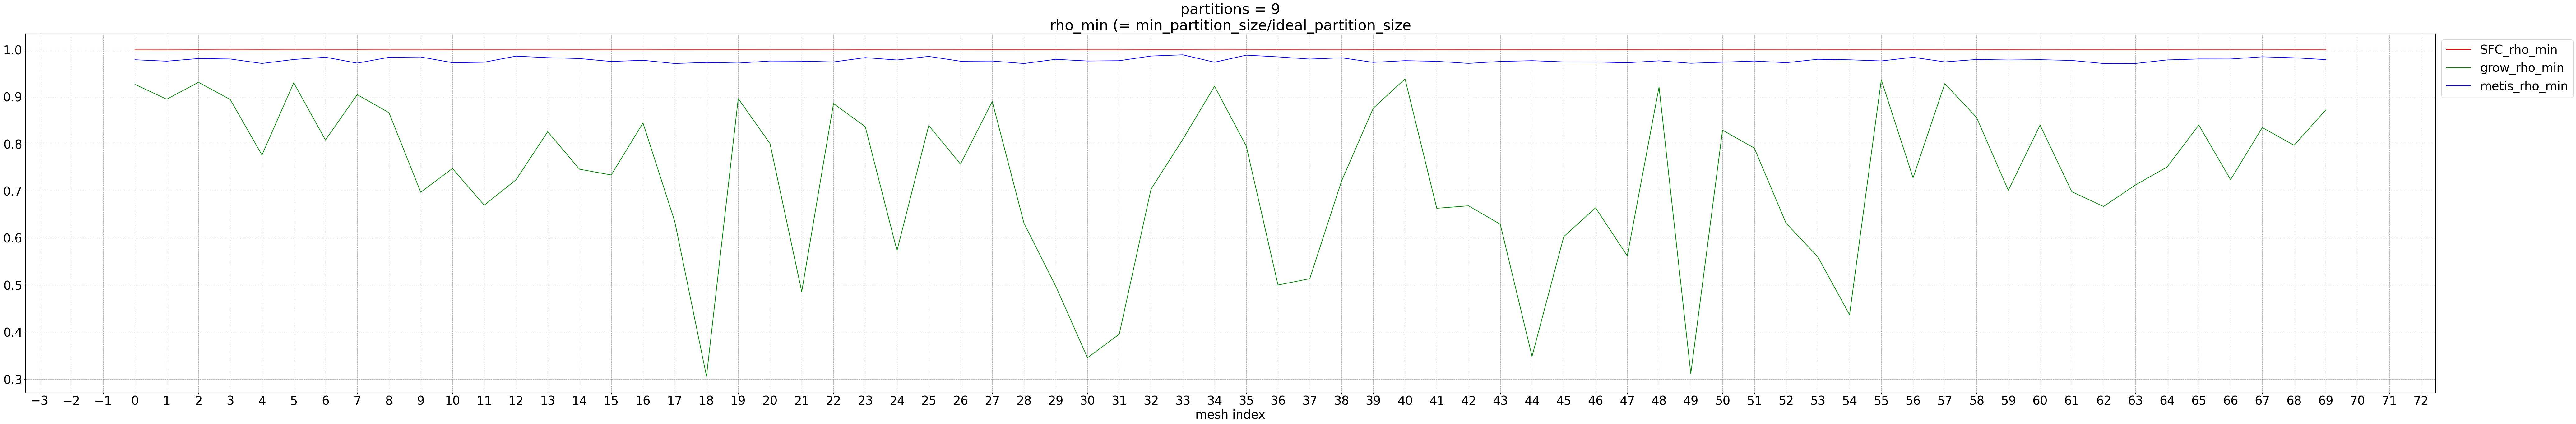

In [269]:
ax3 = df.plot.line(y = ['SFC_rho_min','grow_rho_min','metis_rho_min'], rot=0,color=plot_colors)
ax3.set_title(f"partitions = {partition_count}\nrho_min (= min_partition_size/ideal_partition_size")
ax3.legend(bbox_to_anchor=(1.0, 1.0))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.grid(which='major', axis='both', linestyle='--')
ax3.set_xlabel('mesh index')
